<a href="https://colab.research.google.com/github/Fliptoss/ML_stuff/blob/main/lasso_regression_key_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [4]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1), df['TARGET'], test_size=0.2, random_state=42)

In [6]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [8]:
coefs = []
r2_scores = []

for i in [0, 0.1, 1, 10]:
  reg = Lasso(alpha=i)
  reg.fit(X_train, y_train)

  coefs.append(reg.coef_.tolist())
  y_pred = reg.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

### it seperates the important columns that we need to work on

Text(0.5, 1.0, 'Alpha = 0.1, r2_score=-0.01')

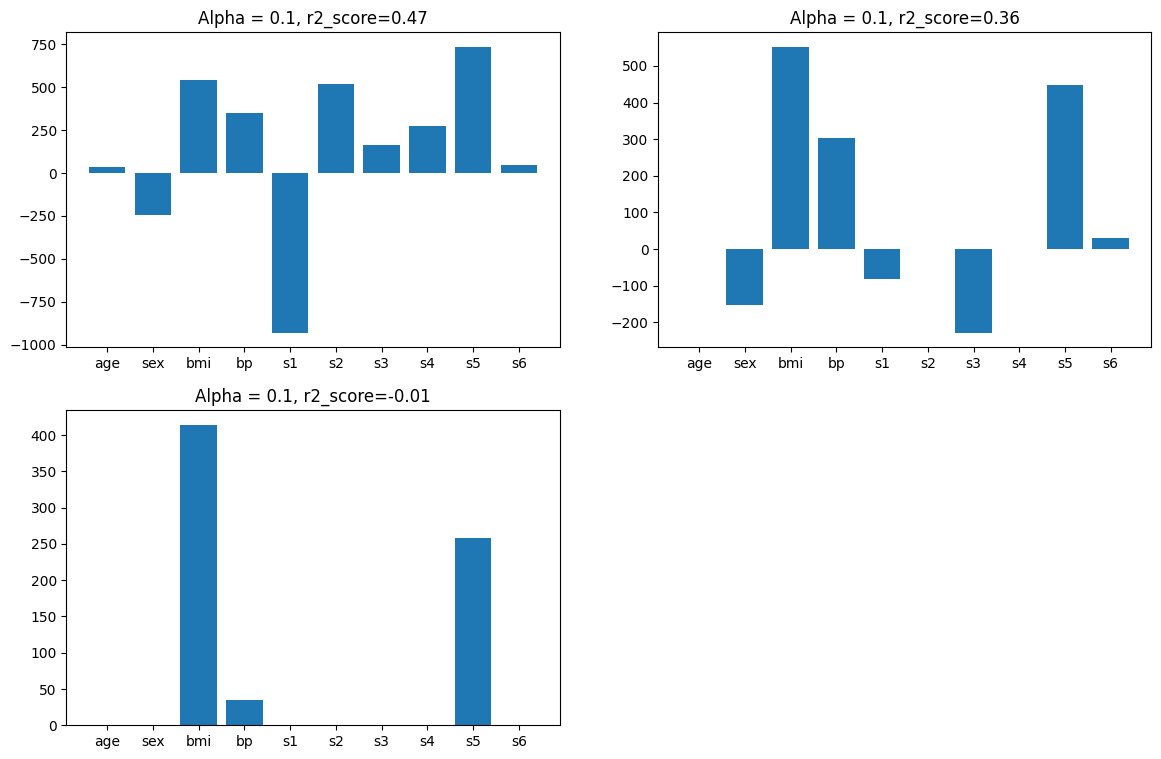

In [9]:
plt.figure(figsize=(14, 9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha = 0.1, r2_score={}'.format(round(r2_scores[1], 2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha = 0.1, r2_score={}'.format(round(r2_scores[2], 2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha = 0.1, r2_score={}'.format(round(r2_scores[3], 2)))

### Higher coefficients are affected more

In [10]:
alphas = [0, 0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]

coefs = []

for i in alphas:
  reg = Lasso(alpha=i)
  reg.fit(X_train, y_train)

  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [11]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488838,518.062271,163.419980,275.317901,736.198856,48.670657
0.0001,37.891667,-241.878244,542.524544,347.624893,-924.832045,513.033268,160.224210,274.036385,733.762619,48.690013
0.0010,37.780431,-241.103200,543.386372,346.914418,-864.934721,467.782935,131.468467,262.504646,711.841733,48.864159
0.0100,35.347451,-231.906664,551.303242,341.313469,-483.567140,165.990532,-25.834899,216.875803,566.815003,49.702475
1.0000,0.000000,-0.000000,413.431848,34.830515,0.000000,0.000000,-0.000000,0.000000,258.152894,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
10000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


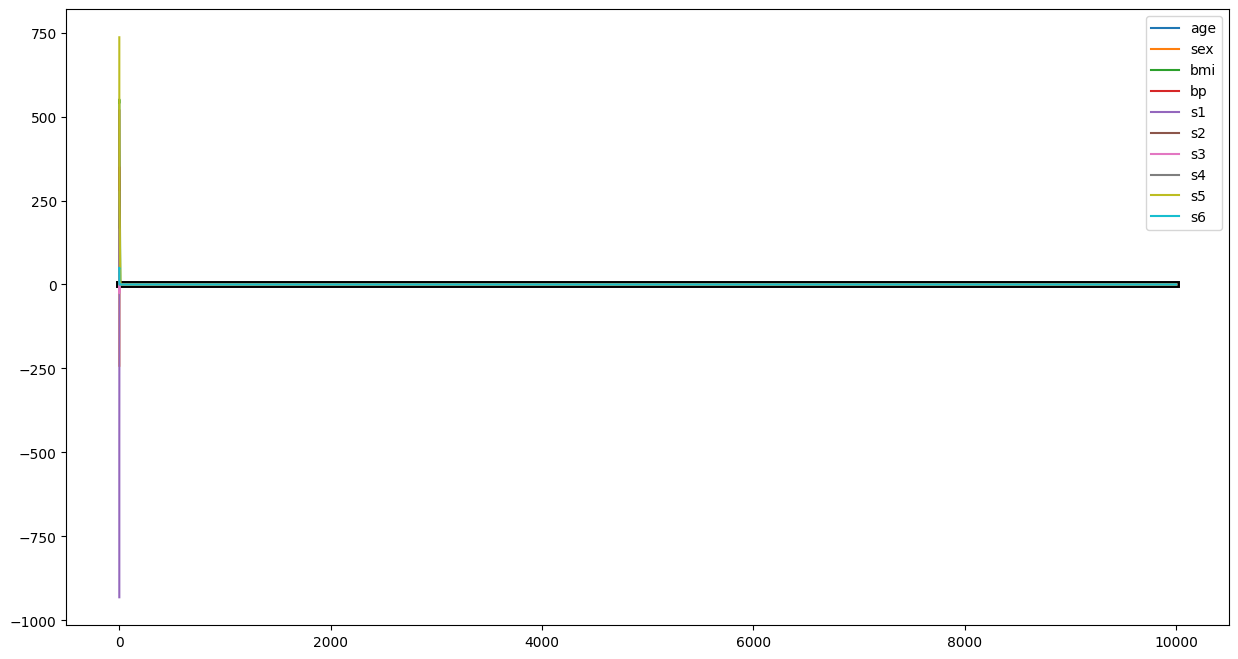

In [12]:
input_array = np.array(coefs).T

plt.figure(figsize=(15, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth =5)
for i in range(input_array.shape[0]):
  plt.plot(alphas, input_array[i], label=data.feature_names[i])

plt.legend()

#### 3. Impact on Bias and Variance

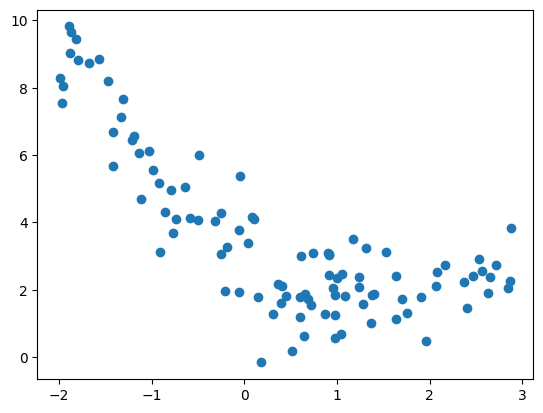

In [14]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 -2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100, 1), y.reshape(100), test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [17]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0, 30, 100)

loss = []
bias = []
variance = []

for i in alphas:
  reg = Lasso(alpha=i)
  avg_expected_loss , avg_bias, avg_var = bias_variance_decomp(
      reg, X_train, y_train, X_test, y_test, loss='mse', num_rounds=100, random_seed=123
      )
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.441e-01, tolerance: 4.915e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.807e-01, tolerance: 5.135e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

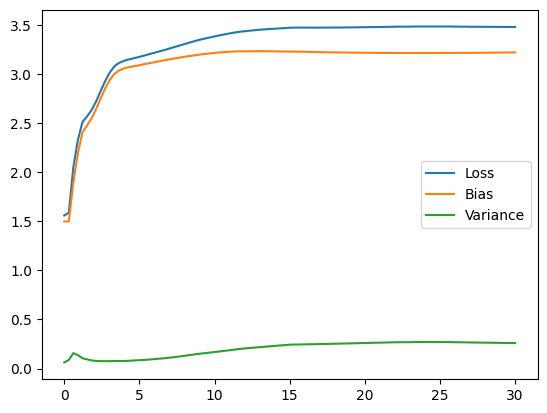

In [18]:
plt.plot(alphas, loss, label='Loss')
plt.plot(alphas, bias, label='Bias')
plt.plot(alphas, variance, label='Variance')
plt.legend()

### 4. Effect of Regularization on Loss Function

[47.13323967]
2.3302306410539453


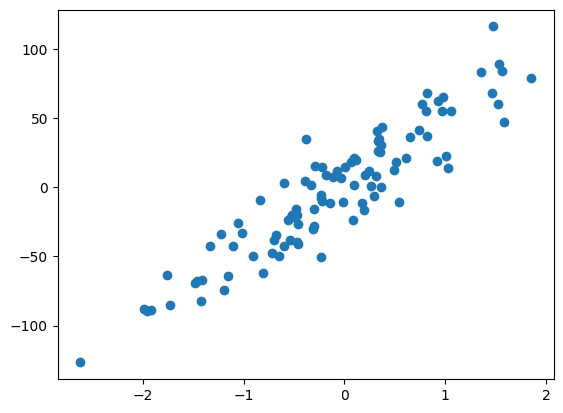

In [19]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

plt.scatter(X, y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

In [20]:
def cal_loss(m, alpha):
  return np.sum((y - m*X.ravel() + 2.29) ** 2) + alpha*abs(m)

In [21]:
def predict(m):
  return m*X - 2.29

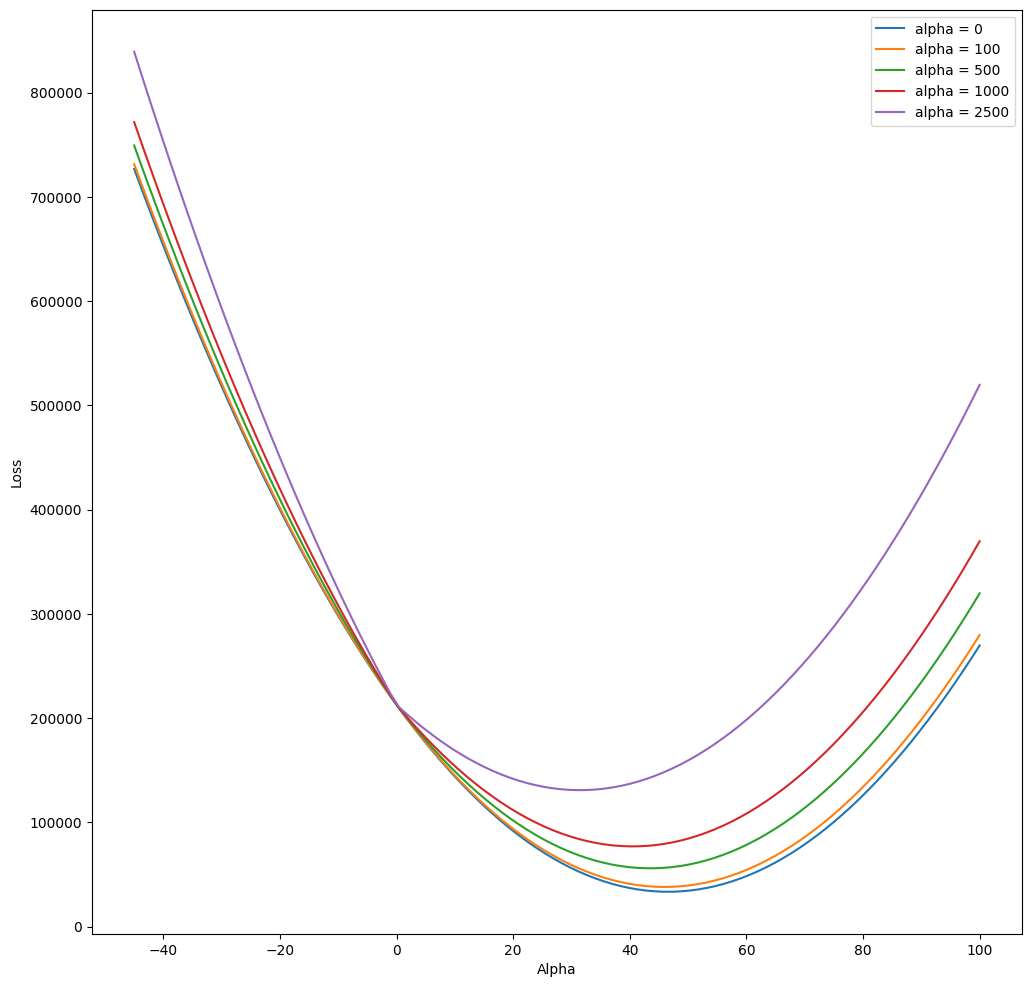

In [22]:
m = np.linspace(-45, 100, 100)
plt.figure(figsize = (12, 12))

for j in [0, 100, 500, 1000, 2500]:
  loss = []
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i], j)
    loss.append(loss_i)
  plt.plot(m, loss, label='alpha = {}'.format(j))

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()